In [5]:
# import the required library
import cv2

# read the input image
image = cv2.imread('701_StillsRaw_full\\701_StillsRaw_full\\0001TP_006690.png')

# define the alpha and beta
alpha = 1.5 # Contrast control
beta = 10 # Brightness control

# call convertScaleAbs function
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
cv2.imwrite("adjusted.png", adjusted)
# display the output image
cv2.imshow('adjusted', adjusted)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
import torch
import torchvision
from torchvision import transforms as T
import cv2
import numpy as np
import os

model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

preprocess = T.Compose([
    T.ToPILImage(),
    T.Resize((512, 512)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_dir = '701_StillsRaw_full\\701_StillsRaw_full'
output_dir = 'segmented_images_deep'

os.makedirs(output_dir, exist_ok=True)

for image_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, image_name)
    image = cv2.imread(img_path)

    input_tensor = preprocess(image).unsqueeze(0)

    # Modeli kullanarak tahmin yap
    with torch.no_grad():
        output = model(input_tensor)['out'][0]
        output_predictions = output.argmax(0).byte().cpu().numpy()

    segmentation_mask = cv2.resize(output_predictions, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    segmentation_mask_color = np.random.randint(0, 255, (21, 3), dtype=np.uint8)[segmentation_mask]

    result_path = os.path.join(output_dir, f'{image_name}')
    cv2.imwrite(result_path, segmentation_mask_color)

print("Segmentasyon işlemi tamamlandı!")


KeyboardInterrupt: 

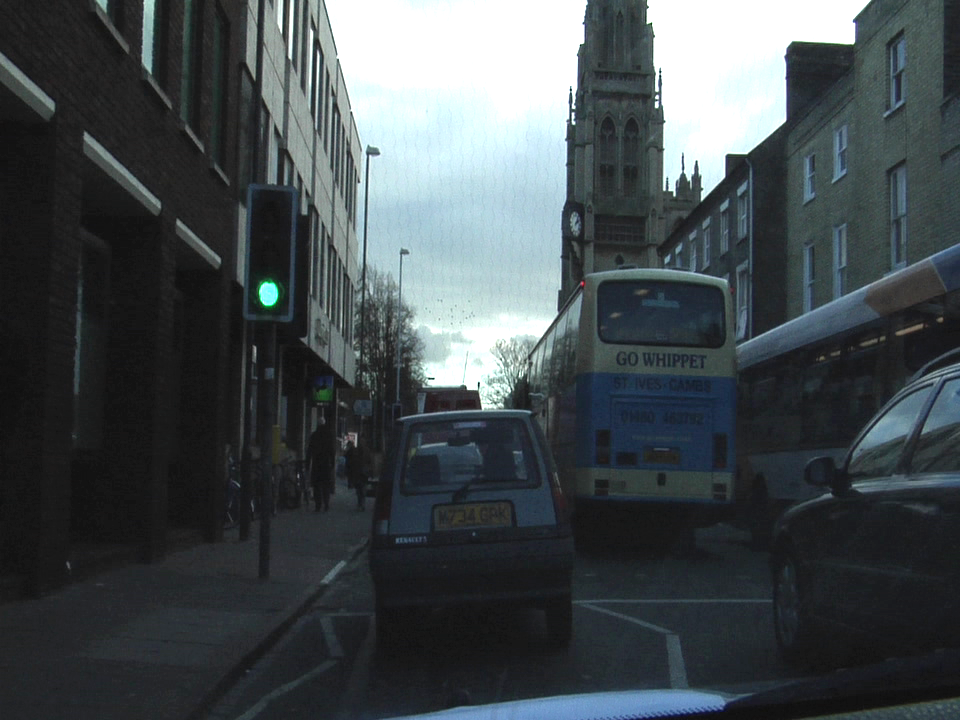

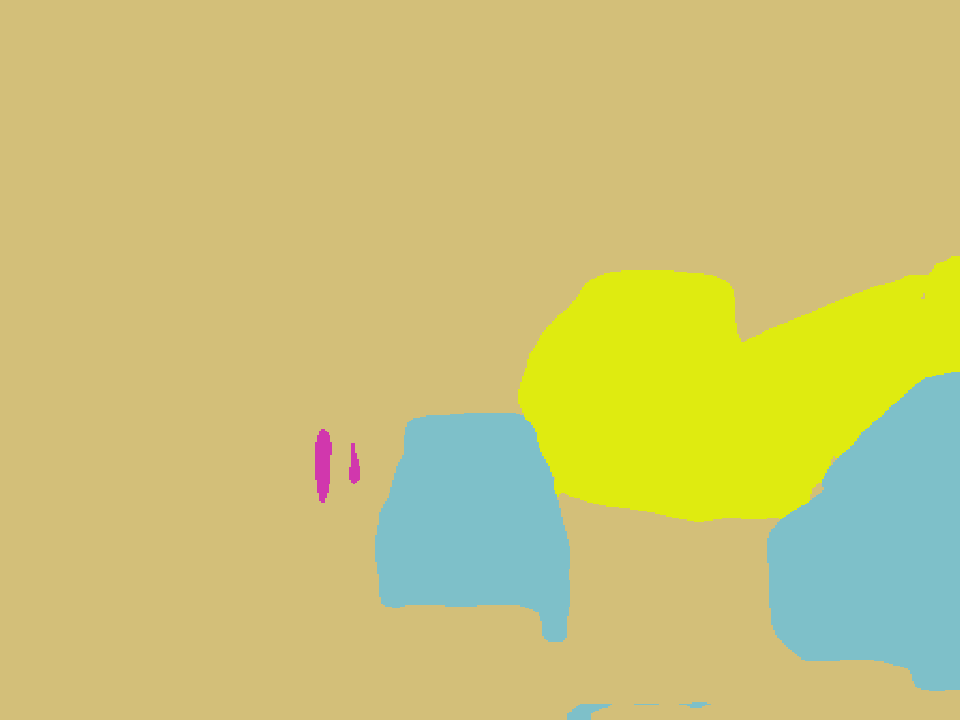

segmented_images_deep\0000adjusted.png


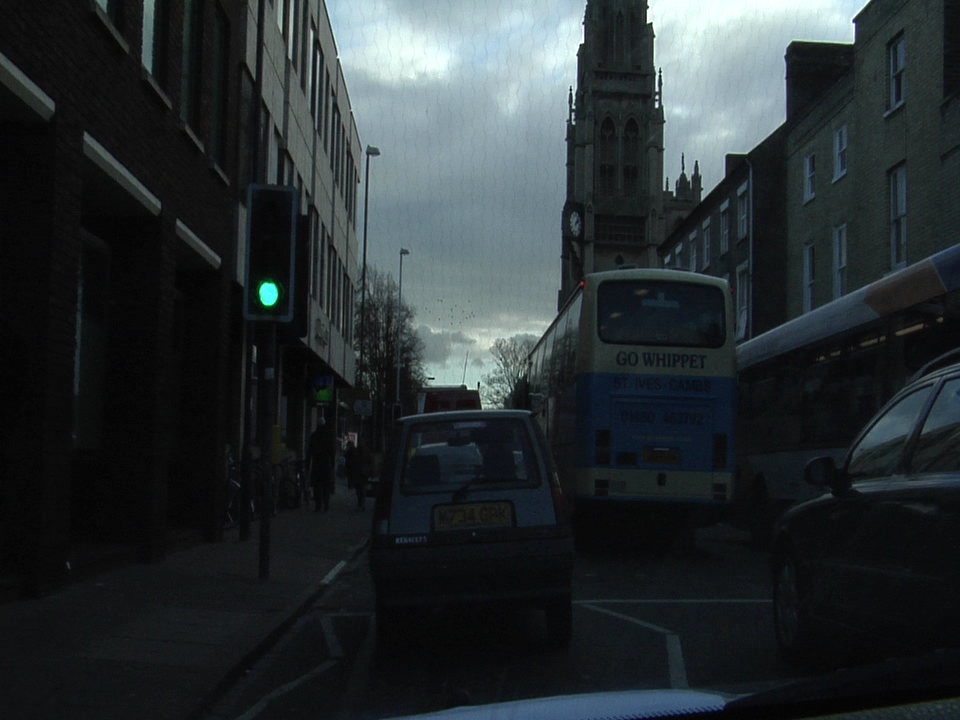

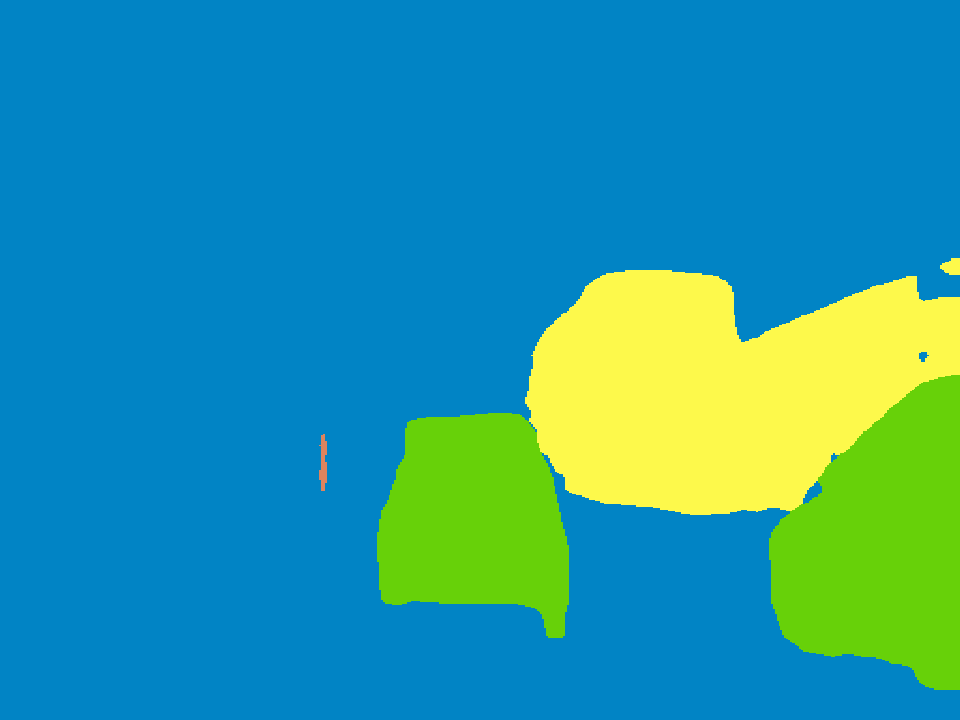

segmented_images_deep\0001TP_006690.png


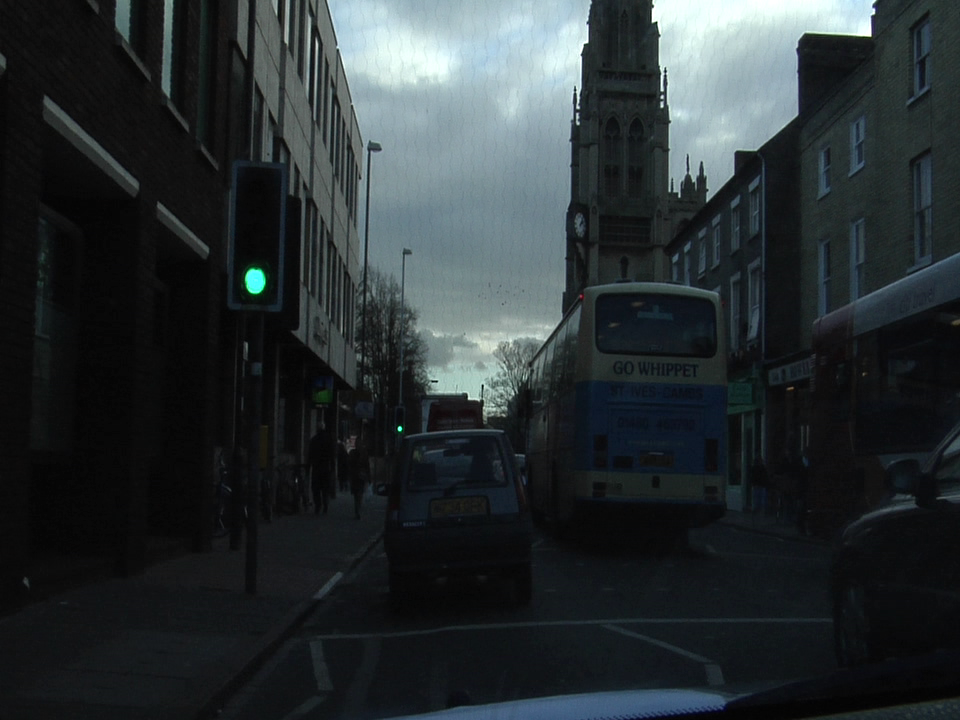

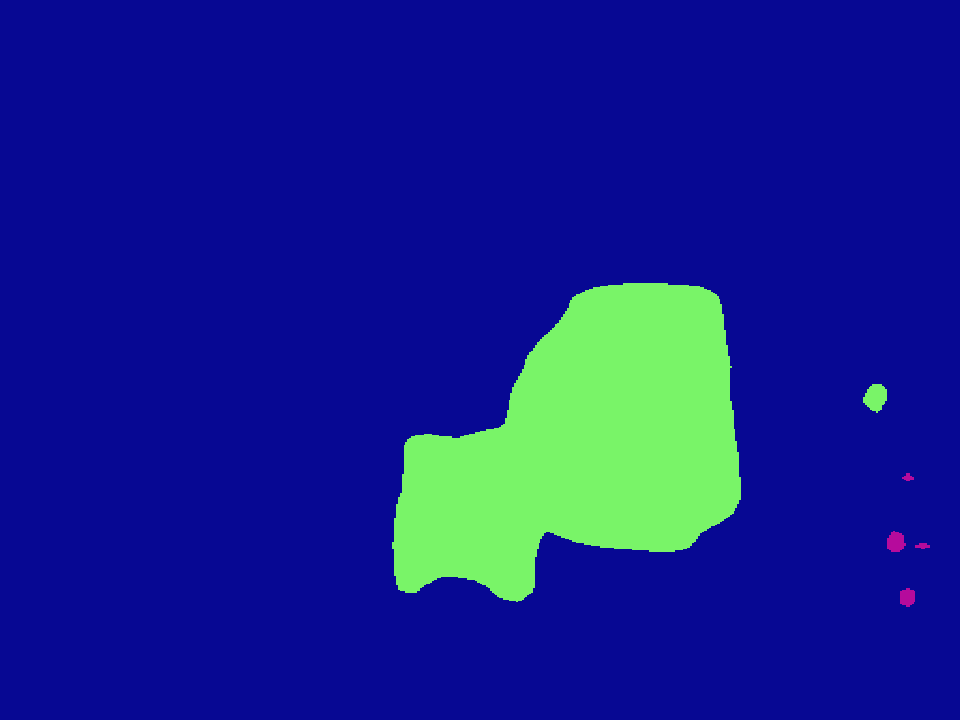

segmented_images_deep\0001TP_006720.png


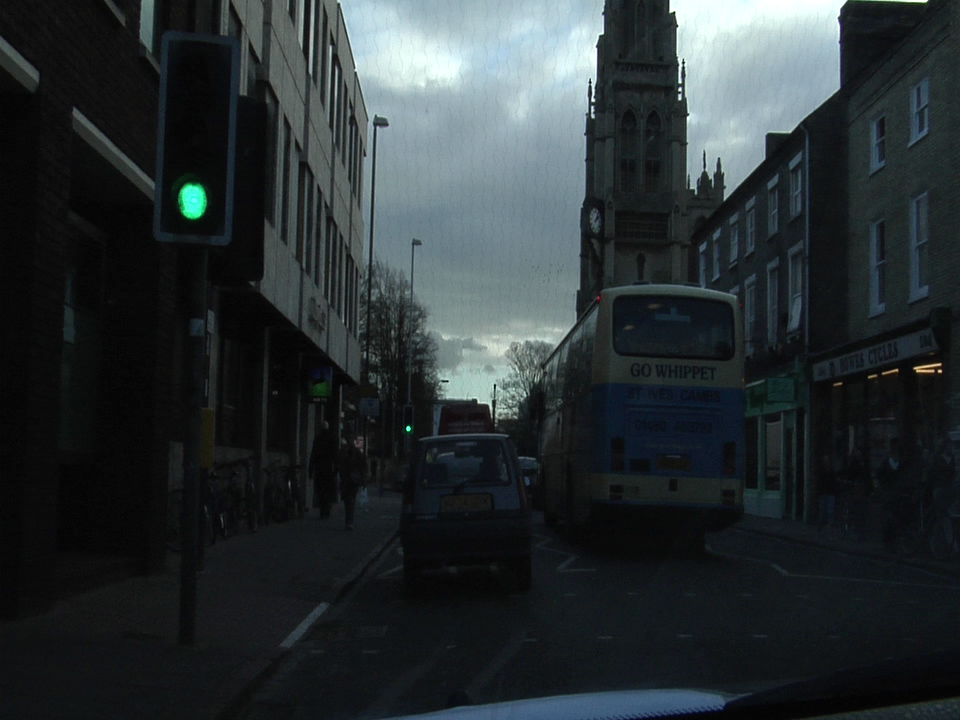

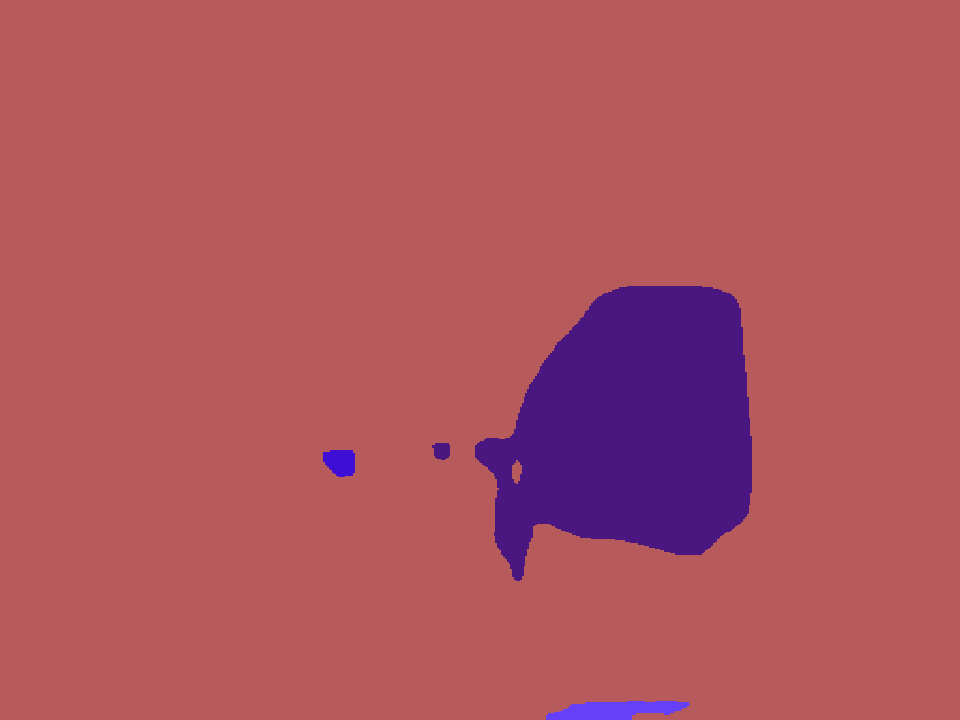

segmented_images_deep\0001TP_006750.png


In [17]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('segmented_images_deep/*.png'): #assuming JPG
    display(Image(filename='701_StillsRaw_full\\701_StillsRaw_full\\' + imageName.split("\\")[1]))
    display(Image(filename='segmented_images_deep\\' + imageName.split("\\")[1]))
    print(imageName)